### Objective:

The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

In [32]:
# Libraries used for data handling and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# Reading the dataset
ctg_df = pd.read_csv('/Users/tonystark/Desktop/Data_Science/CSV_files/Cardiotocographic.csv')

In [34]:
# Checking dataset shape and initial rows
print(ctg_df.shape)
print(ctg_df.head())

(2126, 14)
           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [35]:
# Checking data types and memory usage
ctg_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [36]:
# Checking for missing values
ctg_df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [37]:
# Removing missing values because missing data can affect calculations
ctg_df.dropna(inplace=True)

In [38]:
# Confirming all missing values are removed
ctg_df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

In [39]:
# Checking for duplicate rows
ctg_df.duplicated().sum()

np.int64(2)

In [40]:
# Removing duplicates because repeated rows can affect analysis
ctg_df.drop_duplicates(inplace=True)

In [41]:
# Confirming duplicates are removed
ctg_df.duplicated().sum()

np.int64(0)

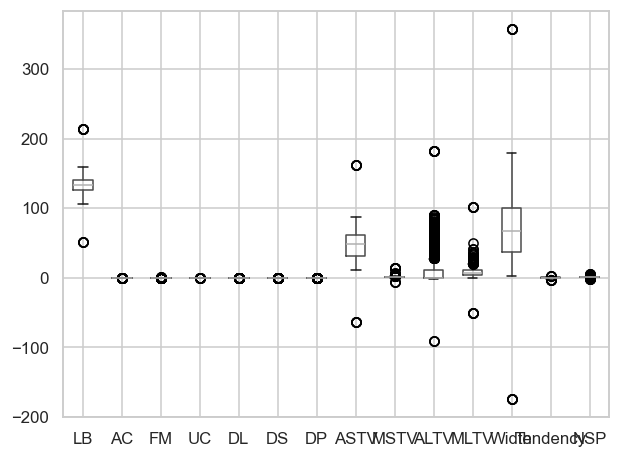

In [42]:
# Boxplot to identify outliers visually
ctg_df.boxplot()
plt.show()

In [43]:
# Function to cap outliers using IQR method
def iqr_capper(dataframe, feature):
    Q1 = dataframe[feature].quantile(0.25)
    Q3 = dataframe[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Capping extreme values to reduce their impact on analysis
    dataframe[feature] = dataframe[feature].apply(
        lambda x: lower_limit if x < lower_limit else upper_limit if x > upper_limit else x
    )

In [44]:
# Applying outlier capping for all numeric columns
for feature in ctg_df.select_dtypes(['int', 'float']).columns:
    iqr_capper(ctg_df, feature)

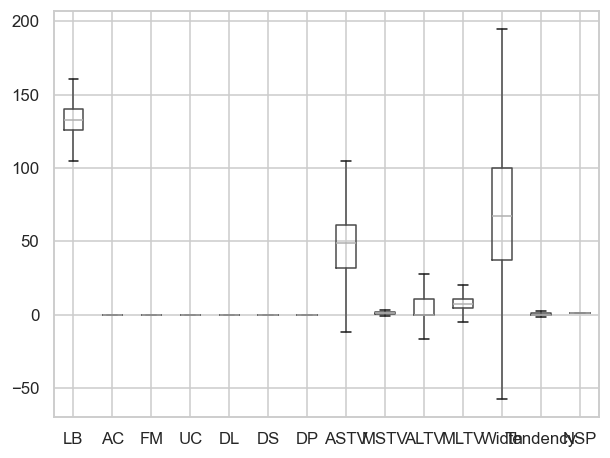

In [45]:
# Boxplot after capping to verify outliers are handled
ctg_df.boxplot()
plt.show()

In [46]:
# Calculating central tendency and spread of the data
ctg_df.agg(['mean', 'median', 'std'])

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
mean,133.291604,0.003144,0.001565,0.004361,0.001770,0.0,0.0,46.999304,1.301912,6.733464,8.017610,70.351685,0.319999,1.0
median,133.000000,0.001631,0.000000,0.004484,0.000000,0.0,0.0,49.000000,1.200000,0.000000,7.400000,67.486468,0.000000,1.0
std,9.976211,0.003844,0.002477,0.003008,0.002675,0.0,0.0,17.633594,0.779896,10.400402,5.094192,39.773195,0.624916,0.0


In [47]:
# Interquartile range for each feature
Q1 = ctg_df.quantile(0.25)
Q3 = ctg_df.quantile(0.75)
IQR = Q3 - Q1
IQR

LB          14.000000
AC           0.005650
FM           0.002559
UC           0.004705
DL           0.003295
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.300000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64

## Key findings

### LB (Baseline Fetal Heart Rate)
The average LB value stays close to 133 BPM, and it does not change much across the dataset.
This steady behavior makes LB a strong and reliable feature, because it gives a clear picture of the normal heart rate pattern.

### ALTV (Abnormal Long-Term Variability)
ALTV is highly uneven. Its average value is around 6.7, but the median is 0.
This means that most records have very low or zero ALTV, and only a small number of cases show abnormal long-term variability.
So, ALTV points out the rare abnormal events in the dataset.

### ASTV (Accelerations)
ASTV shows medium variation with a standard deviation of about 17.6.
This level of spread suggests that ASTV changes enough across samples to help separate different fetal conditions.
It can be an important feature when trying to classify normal vs abnormal outcomes.

### DS, DP, NSP
These features show no variation; their values stay the same for all or most records.
Since they do not change, they do not help in analysis or modeling and can be considered less useful.

### Width
The Width feature shows large variation, meaning it spreads widely across different cases.
This indicates that the measurement changes often and may need scaling or outlier correction to avoid affecting model performance.

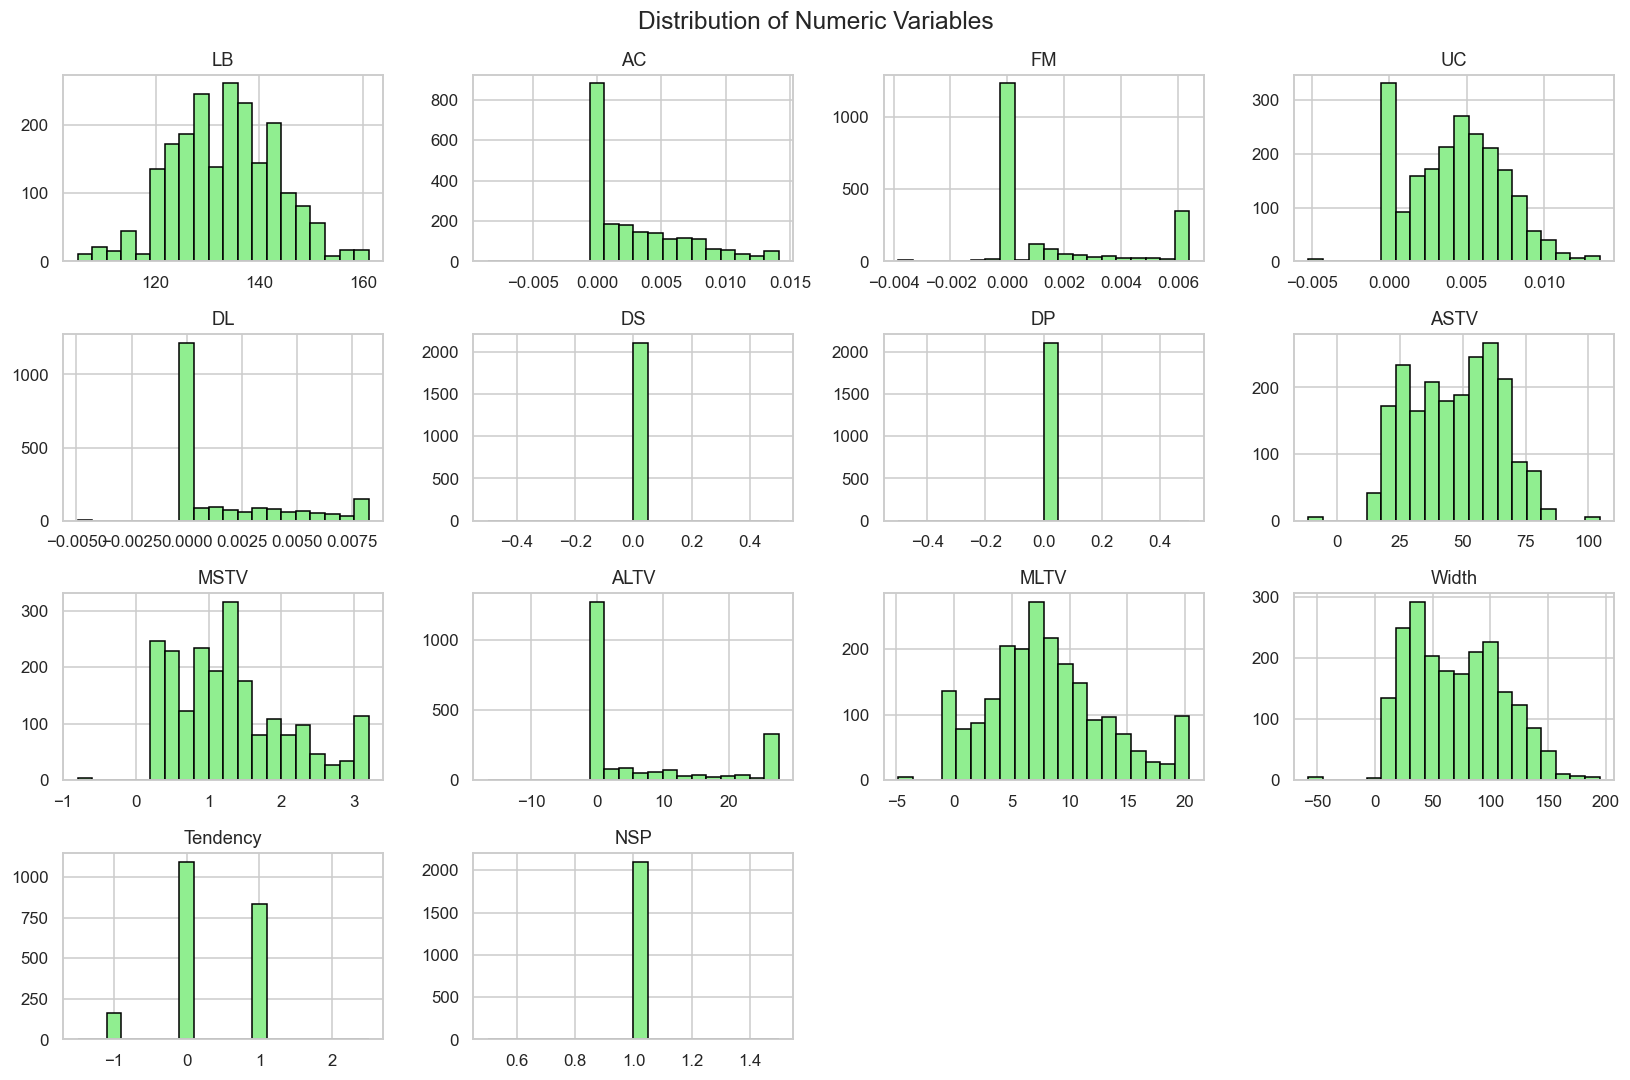

In [48]:
# Histograms to show data distribution
ctg_df.hist(bins=20, figsize=(15, 10), color='lightgreen', edgecolor='black')
plt.suptitle("Distribution of Numeric Variables", fontsize=16)
plt.tight_layout()
plt.show()

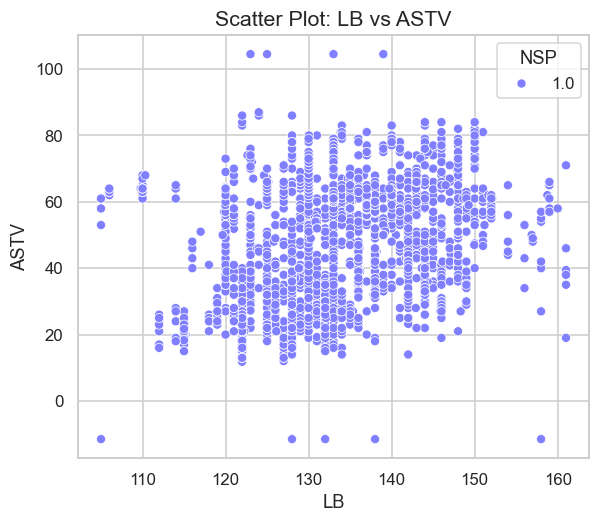

In [49]:
# Scatter plot to see relationship between two features
plt.figure(figsize=(6, 5))
sns.scatterplot(data=ctg_df, x='LB', y='ASTV', hue='NSP', palette='cool')
plt.title("Scatter Plot: LB vs ASTV", fontsize=14)
plt.show()

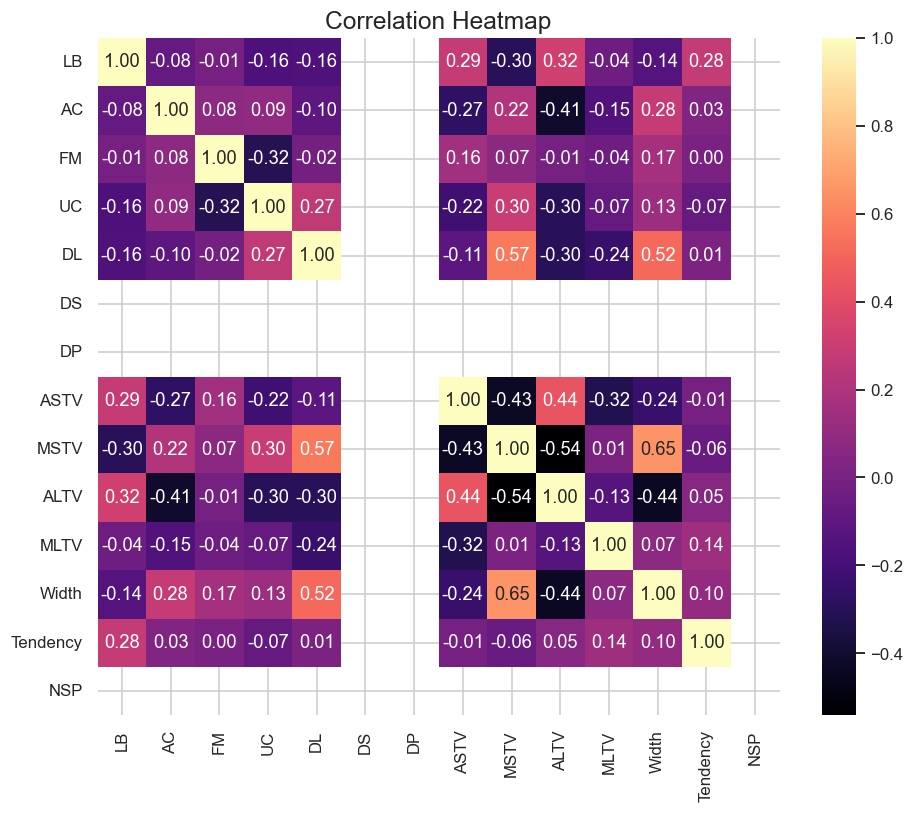

In [50]:
# Correlation heatmap to study relationships between features
plt.figure(figsize=(10, 8))
correlation_matrix = ctg_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [51]:
# Selecting features for violin plot
feature_list = [c for c in ctg_df.columns if c != 'NSP']

/var/folders/lx/y473dmd16l3c0kkr0h14c2x40000gn/T/ipykernel_57243/2001878112.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y=col, data=ctg_df, palette="Pastel1")
/var/folders/lx/y473dmd16l3c0kkr0h14c2x40000gn/T/ipykernel_57243/2001878112.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y=col, data=ctg_df, palette="Pastel1")
/var/folders/lx/y473dmd16l3c0kkr0h14c2x40000gn/T/ipykernel_57243/2001878112.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='NSP', y=col, data=ctg_df, palette="Pastel1")
/var/folde

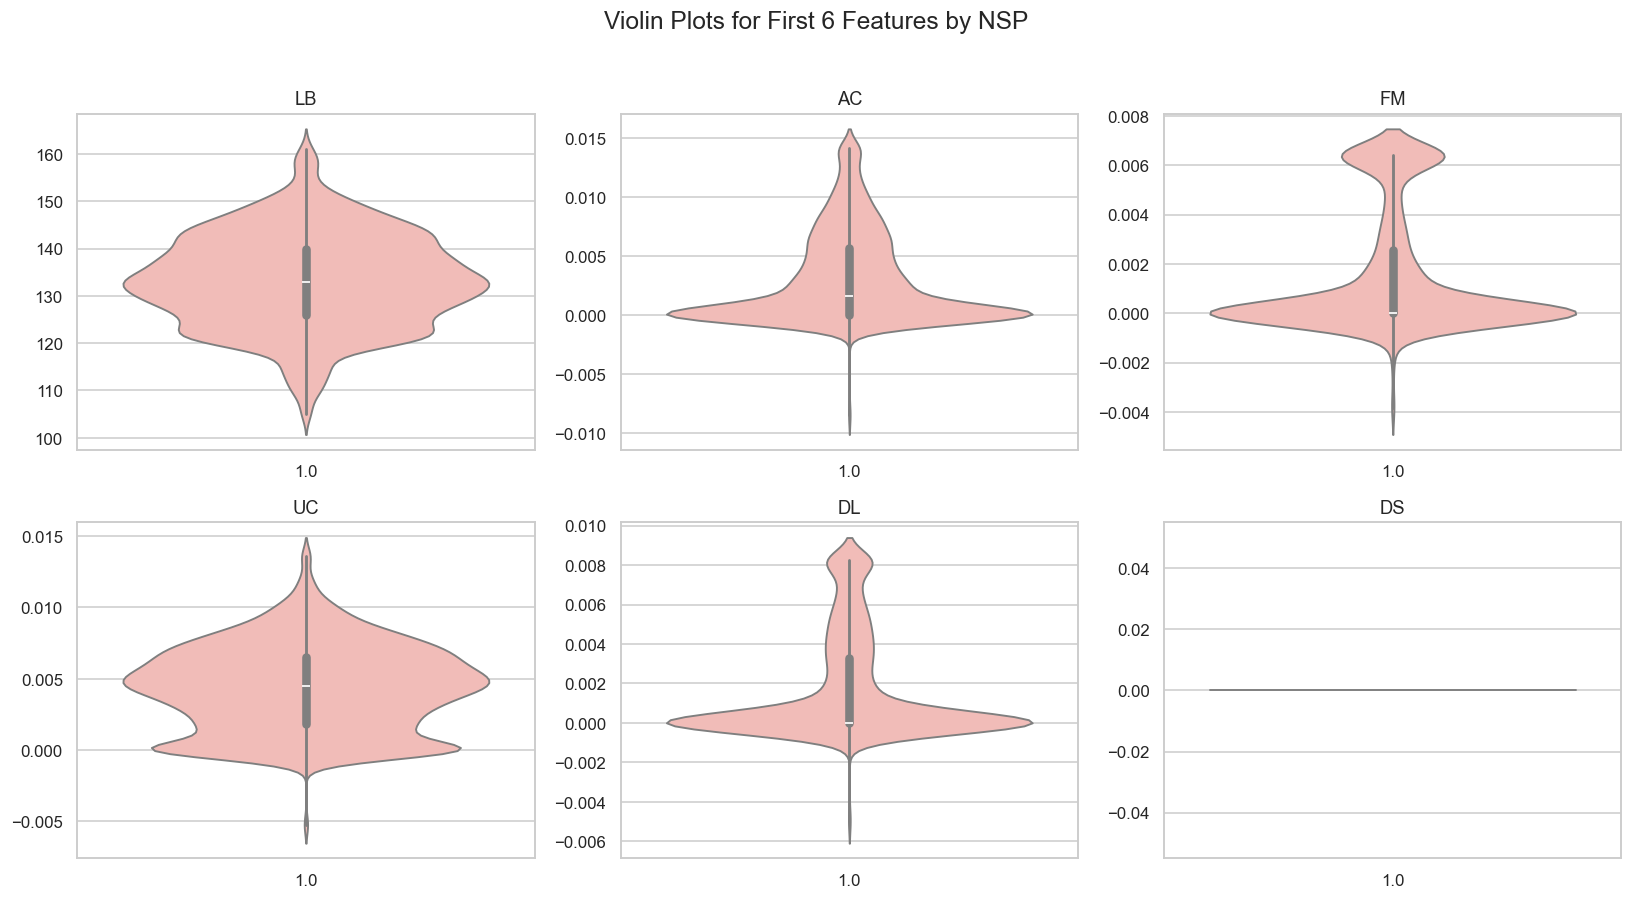

In [52]:
# Violin plots to compare feature distribution with target class
plt.figure(figsize=(15, 8))
for i, col in enumerate(feature_list[:6], 1):
    plt.subplot(2, 3, i)
    sns.violinplot(x='NSP', y=col, data=ctg_df, palette="Pastel1")
    plt.title(col, fontsize=12)
    plt.xlabel("")
    plt.ylabel("")

plt.suptitle("Violin Plots for First 6 Features by NSP", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

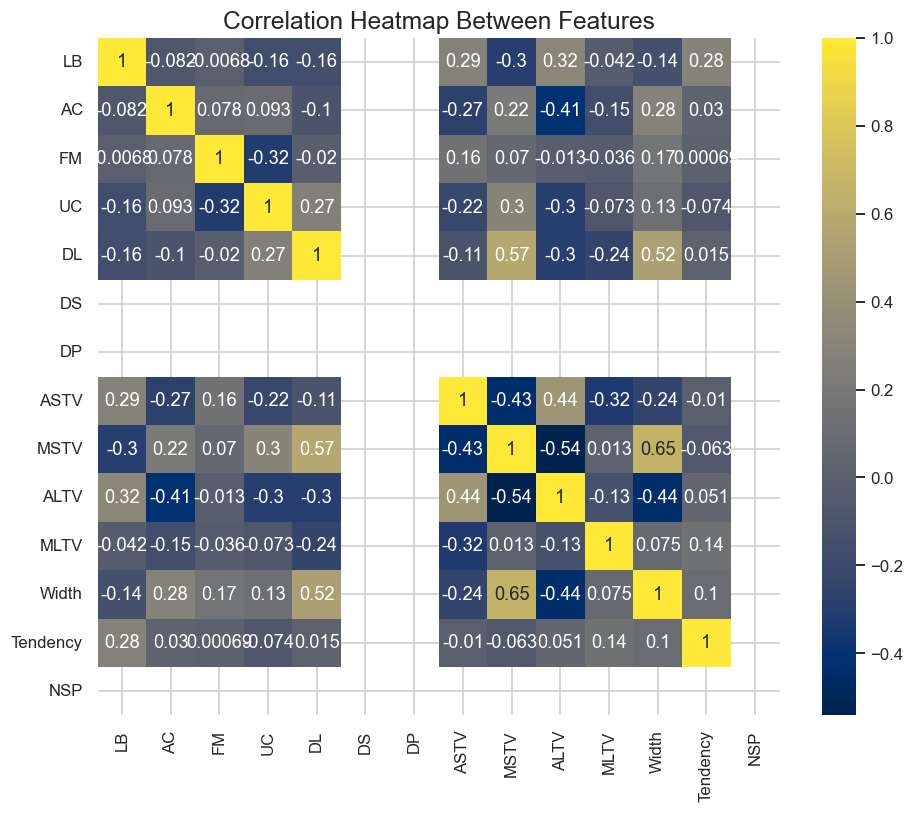

In [53]:
# Final correlation heatmap again for confirmation
plt.figure(figsize=(10, 8))
correlation_matrix = ctg_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cividis')
plt.title("Correlation Heatmap Between Features", fontsize=16)
plt.show()

### Pattern Recognition and Feature Insights

DL ↔ MSTV (correlation ~ 0.57)
These two features show a moderate positive relationship.
When MSTV (short-term variability) increases, DL (decelerations) also tends to increase.
This suggests that higher variability in the heart rate is linked with more deceleration events.

MSTV ↔ Width (correlation ~ 0.65)
This is a strong correlation.
Both features increase together, which fits known fetal activity patterns where wider variability often comes with higher short-term movement.

ASTV ↔ ALTV (correlation ~ 0.44)
These two features have a moderate link.
When ASTV rises, ALTV also tends to rise.
Both reflect fetal activity levels, so this relationship is expected.

DL ↔ Width (correlation ~ 0.52)
Higher Width values are connected with more DL events.
This indicates that when variability becomes broader, the fetus may experience more decelerations.

LB ↔ ASTV / ALTV (around 0.3)
LB has a weak but noticeable relationship with ASTV and ALTV.
This means that changes in baseline heart rate may be slightly connected to variability patterns, but not strongly.

NSP weak correlation with all features
The target variable NSP does not show high correlation with any single feature.
This means the fetal state depends on a combination of factors instead of one dominating variable.

DS, DP near-zero correlation
These features show almost no connection with others.
This suggests they contribute very little to understanding or predicting fetal conditions.

### Temporal Insight (if time-based data is included)

If the dataset includes time tracking, several meaningful patterns can be observed:

Changes in ASTV, MSTV, and DL over time may show periods of activity and stress.
A rising pattern could signal developing fetal distress.

Stable LB and UC patterns over time usually indicate healthy baseline conditions and normal uterine activity.

If features like Width or Tendency keep shifting, it can show transitions between active and resting fetal states.

These time-based trends help identify early warning signs and routine behavior cycles.

### Conclusion (Rewritten & Expanded)

The dataset mostly contains numerical features, and only a few of them show moderate relationships such as MSTV–Width, DL–MSTV, and ASTV–ALTV.
These pairs of features may jointly influence fetal health conditions.

Most features have weak correlations, which means no single variable is controlling the NSP outcome.
Instead, the classification depends on a combination of multiple physiological signals.

The weak overall correlation is actually helpful for modeling, because each feature adds unique information.
This allows machine learning models to capture more complex and meaningful patterns.

If temporal information is available, it can help track how fetal conditions evolve with time.
Such patterns can support early detection of potential distress and help doctors make better clinical decisions.

Overall, these insights give a strong foundation for building predictive models and support medical professionals in evaluating fetal health more accurately and effectively.